In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print(df.head(5))  

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [10]:
#Checking Shape and NULL+Duplicate values
print("DataSet Shape",df.shape)
df.info()

print("Null Values:\n",df.isnull().sum())
print("Duplicated Values:",df.duplicated().sum())


DataSet Shape (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14 

In [13]:
print(df.describe)

<bound method NDFrame.describe of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Educati

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


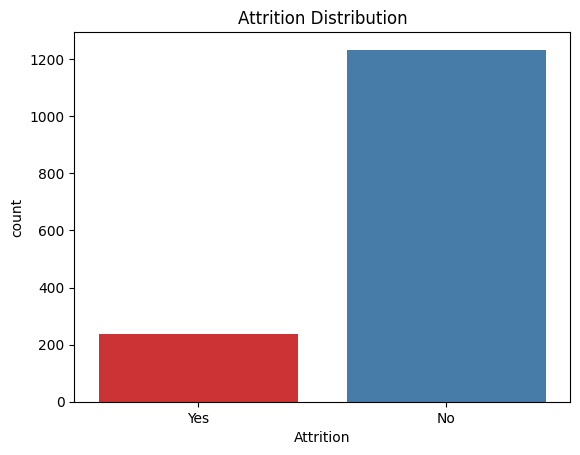

In [33]:
print(df['Attrition'].value_counts(normalize = True)*100) 
sns.countplot(x ='Attrition',data = df,hue = 'Attrition',palette = 'Set1')
plt.title("Attrition Distribution")
plt.show()

### Overall Attrition Rate
- Approximately **16% of employees** have left the company.
- Indicates a moderate attrition challenge and potential loss of talent.

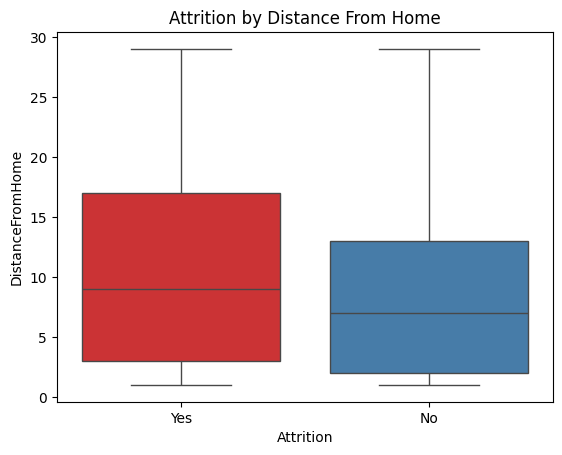

In [41]:
sns.boxplot(x = 'Attrition',y = 'DistanceFromHome',data  = df,hue = 'Attrition',palette = 'Set1')
plt.title("Attrition by Distance From Home")
plt.show()

### Distance From Home
- Employees who live **farther from the office** show slightly higher attrition.
- Consider promoting **remote or hybrid work options** to improve retention.

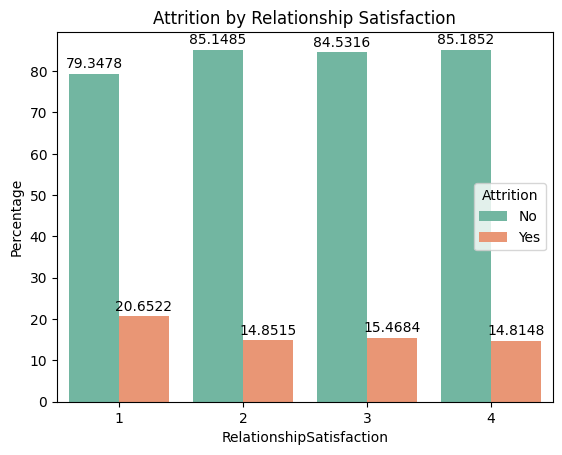

In [23]:
percentage_df = (df.groupby('RelationshipSatisfaction')['Attrition'].value_counts(normalize = True).rename("Percentage") * 100).reset_index()

ax = sns.barplot(x = 'RelationshipSatisfaction',y = "Percentage",data = percentage_df,hue = 'Attrition',palette = 'Set2')
for container in ax.containers:
    ax.bar_label(container,fmt='%g',label_type='edge',padding=2)
    
plt.title("Attrition by Relationship Satisfaction")
plt.show()


### Relationship Satisfaction
- Employees with **low satisfaction (1 or 2 or 3)** are more likely to quit.
- Suggests need for **better manager-employee relationships** and team engagement programs.


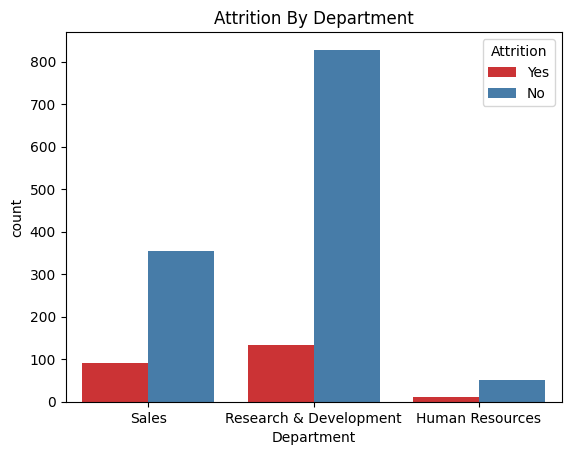

In [64]:
sns.countplot(x = 'Department',data = df, hue = 'Attrition',palette = 'Set1')
plt.title("Attrition By Department")
plt.show()

### Department
- **Sales Department**  and **R&D Department** has a **notably higher attrition rate**.
- Indicates a need to **review departmental pressures, expectations, and culture**.


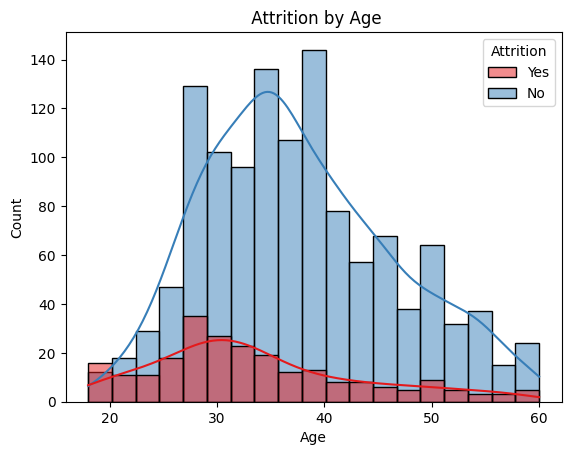

In [57]:
sns.histplot(x = 'Age',data = df, hue = 'Attrition',kde = True,palette ='Set1')
plt.title(" Attrition by Age")
plt.show()

### Age
- Younger employees (**aged 20–35**) leave more frequently.
- May be due to **ambition, better offers, or lack of growth plans**.
- Suggest **career development programs** for this segment.


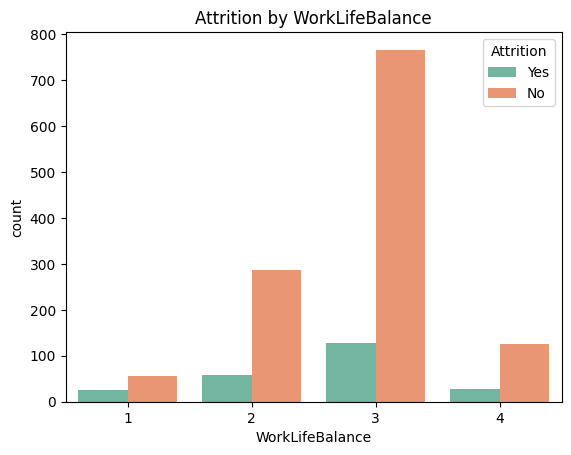

In [58]:
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='Set2')
plt.title('Attrition by WorkLifeBalance')
plt.show()


### Work-Life Balance
- Employees rating **work-life balance as poor (2 or 3)** show higher attrition.
- Company should revisit policies related to **flexibility, breaks, and hours**.


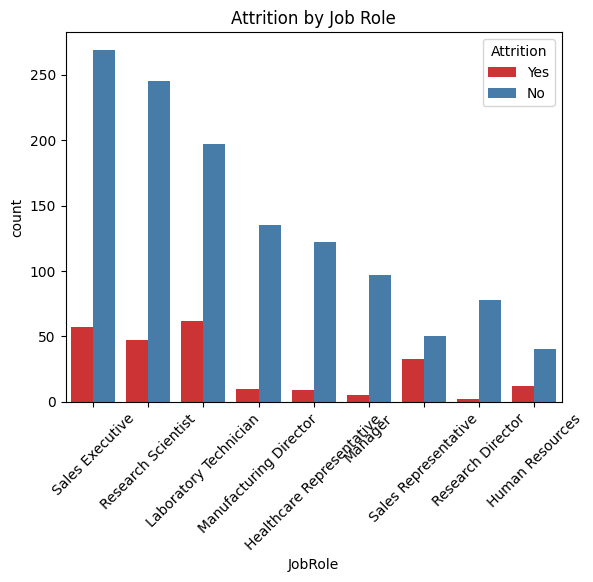

In [61]:
sns.countplot(x='JobRole', hue='Attrition', data=df, palette='Set1')
plt.title('Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()

### Job Role
- **Sales Executives** ,**Research Scientist** and **Laboratory Technicians** have the **highest turnover**.
- Indicates role-specific stress or dissatisfaction; restructure or support may be needed.


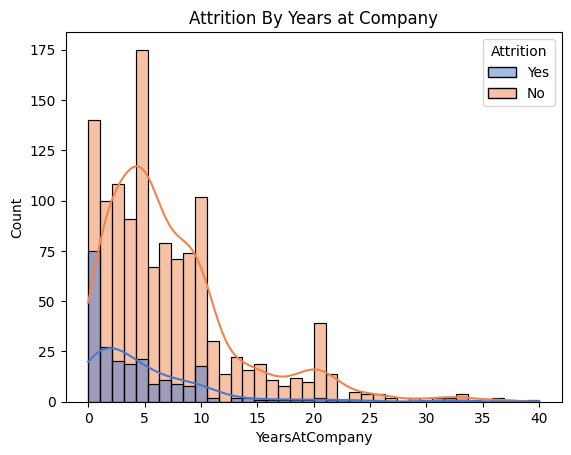

In [62]:
sns.histplot(data=df, x='YearsAtCompany', hue='Attrition', kde=True, palette='muted')
plt.title('Attrition By Years at Company')
plt.show()

### Years at Company in Same Role
- Most attrition happens within the **first 0–5 years**.
- Highlights need for better **onboarding, mentoring, and early career support**.


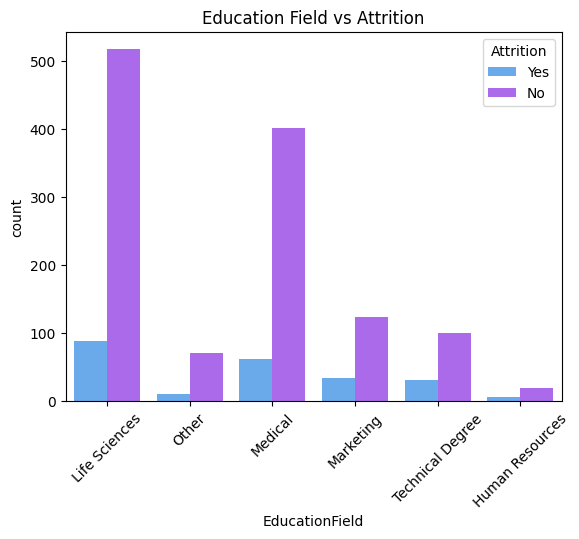

In [63]:
sns.countplot(x='EducationField', hue='Attrition', data=df, palette='cool')
plt.title('Education Field vs Attrition')
plt.xticks(rotation=45)
plt.show()


### Education Field & Performance Rating
- Certain education fields  **Life Sciences** and **Medical** show higher attrition.
- Could indicate a **skills mismatch or growth barrier** and **Not Satisfied**; training and reskilling may help.


In [3]:
df.to_csv("Cleaned_Employee_Attrition.csv",index = False)